<a href="https://colab.research.google.com/github/Loomer/2022-itc303-team08/blob/ml-manu/ml_manu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Cloning repository from github
!git clone -b ml-manu https://github.com/Loomer/2022-itc303-team08

Cloning into '2022-itc303-team08'...
remote: Enumerating objects: 2701, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 2701 (delta 4), reused 0 (delta 0), pack-reused 2690
Receiving objects: 100% (2701/2701), 532.39 MiB | 27.95 MiB/s, done.
Resolving deltas: 100% (104/104), done.
Checking out files: 100% (1404/1404), done.


In [2]:
#Importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
#Importing modules to be used in model development
import matplotlib.pyplot as pypt 
import cv2
import os 

994


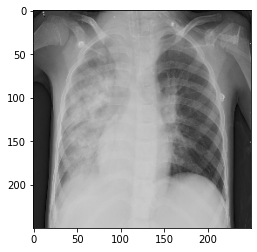

In [4]:
image_set = "/content/2022-itc303-team08/images/train" #Getting the images for the training set
imageType = ["COVID", "NORMAL"] #Classifying the image set as normal and covid
train_set = []
train_labels = []

#Function for creating training data
def create_train_data():
  for imgType in imageType: 

    link = os.path.join(image_set, imgType) #Creating path for covid and normal lung images
         
    for img in os.listdir(link): 
      if img == "Thumbs.db":
        continue 
      img_array = cv2.imread(os.path.join(link, img)) #Converting image to array  
      new_img_array = cv2.resize(img_array, (250, 250)) #Resizing the image array  
      train_set.append(new_img_array) #Adding array to training set
      train_labels.append(imageType.index(imgType)) #Adding labels to training labels

#Calling the function to create training data
create_train_data()
print(len(train_set))
pypt.imshow(train_set[0])

In [5]:
train_set = np.array(train_set) #Converting training set to numpy array
train_labels = np.array(train_labels) #Converting training labels to numpy array
train_set = train_set/255.0 #Dividing by 255.0 to have the values between 0 and 1

In [6]:
#Function for creating the model
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(250, 250, 3)), #First layer
    tf.keras.layers.MaxPooling2D(2, 2), #Pooling the pixels
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), #Second layer
    tf.keras.layers.MaxPooling2D(2,2), #Pooling the pixels
    tf.keras.layers.Flatten(), #Flattening the input into a single dimension
    tf.keras.layers.Dropout(0.5), #Dropping out neurons to improve accuracy
    tf.keras.layers.Dense(512, activation=tf.nn.relu), #Dense layer
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)]) #Dense layer
  
  #Compiling the model
  model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [7]:
#Creating a model
model = create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 476288)            0         
                                                                 
 dropout (Dropout)           (None, 476288)            0

In [8]:
validation_set = []
validation_labels = []

val_image_set = "/content/2022-itc303-team08/images/val"

#Function for creating validation data
def create_validation_data():
  for imgType in imageType: 

    link = os.path.join(val_image_set, imgType)  
        
    for img in os.listdir(link): 
      if img == "Thumbs.db":
        continue 
      test_img_array = cv2.imread(os.path.join(link, img)) #Converting image to array   
      new_test_array = cv2.resize(test_img_array, (250, 250)) #Resizing the image array   
      validation_set.append(new_test_array) #Adding array to training set
      validation_labels.append(imageType.index(imgType)) #Adding labels to training labels

#Calling the function to create validation data
create_validation_data()
print(len(validation_set))
print(validation_labels)

198
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [9]:
validation_set = np.array(validation_set) #Converting validation set to numpy array
validation_labels = np.array(validation_labels) #Converting validation labels to numpy array
validation_set = validation_set/255.0 #Dividing by 255.0 to have the values between 0 and 1

model.evaluate(validation_set, validation_labels) #Evaluating the model

7/7 [==============================] - 14s 2s/step - loss: 0.6942 - accuracy: 0.4697


[0.6942059397697449, 0.469696968793869]

In [10]:
#Saving model weights in the checkpoint file
checkpoint_path = "2022-itc303-team08/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [11]:
#Saving model weights in the checkpoint file
checkpoint_path = "2022-itc303-team08/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose =1, period = 5)

new_model = create_model()

#Fittng the model
new_model.fit(train_set, train_labels, epochs=10, validation_data = (validation_set, validation_labels), callbacks = [cp_callback])

Epoch 1/10
32/32 [==============================] - 286s 9s/step - loss: 3.6214 - accuracy: 0.7213 - val_loss: 0.4336 - val_accuracy: 0.8182
Epoch 2/10
32/32 [==============================] - 287s 9s/step - loss: 0.3521 - accuracy: 0.8783 - val_loss: 0.4356 - val_accuracy: 0.8586
Epoch 3/10
32/32 [==============================] - 289s 9s/step - loss: 0.2503 - accuracy: 0.9235 - val_loss: 0.4026 - val_accuracy: 0.8838
Epoch 4/10
32/32 [==============================] - 275s 9s/step - loss: 0.2104 - accuracy: 0.9225 - val_loss: 0.5133 - val_accuracy: 0.8737
Epoch 5/10
32/32 [==============================] - ETA: 0s - loss: 0.0829 - accuracy: 0.9698
Epoch 5: saving model to 2022-itc303-team08/cp.ckpt
32/32 [==============================] - 291s 9s/step - loss: 0.0829 - accuracy: 0.9698 - val_loss: 0.7902 - val_accuracy: 0.7121
Epoch 6/10
32/32 [==============================] - 274s 9s/step - loss: 0.1096 - accuracy: 0.9638 - val_loss: 0.4663 - val_accuracy: 0.8939
Epoch 7/10
32/32 [=

In [12]:
#Saving the model in a h5 file 
new_model.save('new_model.h5', include_optimizer=False)

In [13]:
#loading the saved model
loaded_model = tf.keras.models.load_model('new_model.h5')

In [14]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 248, 248, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 124, 124, 64)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 128)     73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 61, 61, 128)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 476288)            0         
                                                                 
 dropout_1 (Dropout)         (None, 476288)           

In [ ]:
#Loading the model with the saved weights
model.load_weights(checkpoint_path)
loss, acc = model.evaluate(validation_set, validation_labels)
print(loss, acc)

7/7 [==============================] - 14s 2s/step - loss: 0.1994 - accuracy: 0.9293
0.19942446053028107 0.9292929172515869


In [ ]:
#prediction = model.predict(validation_set)
#print(prediction)

[[1.0000000e+00 2.9481945e-13]
 [1.0000000e+00 4.2141216e-17]
 [1.0000000e+00 1.5730692e-17]
 [9.9999988e-01 1.3205140e-07]
 [1.0000000e+00 1.9746350e-19]
 [5.8624146e-09 1.0000000e+00]
 [1.3070826e-11 1.0000000e+00]
 [3.1015812e-08 1.0000000e+00]
 [5.4160121e-11 1.0000000e+00]
 [1.3898385e-02 9.8610163e-01]]


In [15]:
test_set = []
test_labels = []

test_image_set = "/content/2022-itc303-team08/images/test"

#Function for creating test data
def create_test_data():
  for imgType in imageType: 

    link = os.path.join(val_image_set, imgType)  
        
    for img in os.listdir(link): 
      if img == "Thumbs.db":
        continue 
      test_img_array = cv2.imread(os.path.join(link, img)) #Converting image to array 
      new_testing_array = cv2.resize(test_img_array, (250, 250)) #Resizing the image array
      test_set.append(new_testing_array) #Adding array to training set
      test_labels.append(imageType.index(imgType)) #Adding labels to training labels

#Calling the function to create test data
create_test_data()
print(len(test_set))
print(test_labels)

198
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(250, 250))
  test_image = image.img_to_array(img)
  test_image = np.expand_dims(test_image, axis=0)

  images = np.vstack([test_image])
  prediction = model.predict(images)
  print(fn)
  print(prediction)
  print(type(prediction))

  print(imageType[np.argmax(prediction[0])])

Saving test-normal-2.png to test-normal-2.png
test-normal-2.png
[[0. 1.]]
<class 'numpy.ndarray'>
NORMAL
